In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
tend = 40 * 24 * 60 * 60
dt = 1 * 24 * 60 * 60

In [3]:
bl = Batch(tend, dt)

In [4]:
# ED
bl.add_species(name='POC', init_conc=12e-3)
bl.add_species(name='CO2', init_conc=2e-3)
bl.add_species(name='Fe2', init_conc=0)
bl.add_species(name='CH4', init_conc=0)

# EA
bl.add_species(name='NO3', init_conc=1.5e-3)
bl.add_species(name='Fe3', init_conc=17.8e-3)
bl.add_species(name='SO4', init_conc=1.7e-3)

# Henry law equilibrium:
bl.add_species(name='CH4g', init_conc=0)
bl.add_partition_equilibrium('CH4', 'CH4g', 1.4)

In [5]:
bl.constants['Km_NO3'] = 0.001e-3
bl.constants['Km_Fe3_surf'] = 2e-3
bl.constants['Km_SO4'] = 0.3e-4
bl.constants['k1'] = 1 / 24 / 60 / 60
bl.constants['SA'] = 600
bl.constants['ro_min'] = 3.84e-6
bl.constants['MW_Fe3'] = 106.8
bl.constants['Fe3_init'] = 17.8e-3

In [6]:
bl.rates['r_NO3'] = 'k1 * POC * NO3 / (Km_NO3 + NO3)'
bl.rates['r_Fe3'] = 'k1 * POC * Fe3 / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
bl.rates['r_SO4'] = 'k1 * POC * SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
bl.rates['r_CH4'] = 'k1 * POC * Km_SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'

In [7]:
bl.dcdt['POC'] = '- r_NO3 - r_Fe3 - r_SO4 - r_CH4'
bl.dcdt['NO3'] = '- 4 / 5 * r_NO3'
bl.dcdt['Fe3'] = '- 4 * r_Fe3'
bl.dcdt['Fe2'] = '4 * r_Fe3'
bl.dcdt['SO4'] = '- 1 / 2 * r_SO4'
bl.dcdt['CO2'] = '1 * (r_NO3 + r_Fe3 + r_SO4)'
bl.dcdt['CH4'] = '1 / 2 * r_CH4'

In [8]:
bl.solve()

Simulation started:
	 2026-01-30 18:25:20


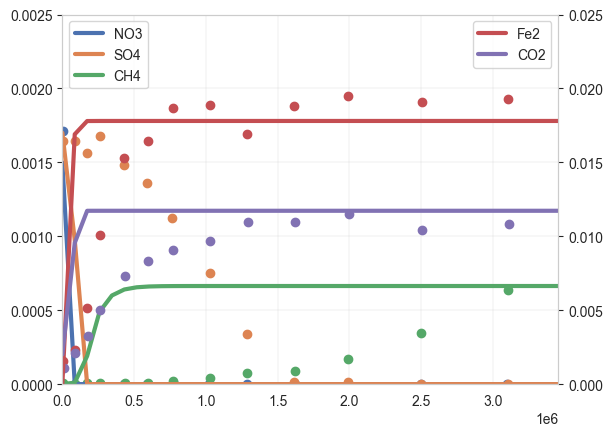

In [9]:
SO4_t = np.array([0.013, 1.013, 2.016, 3.005, 4.985, 6.851, 8.865, 11.882, 14.899, 18.713, 23.057, 28.923, 35.955])*24*60*60
SO4 = np.array([1.643, 1.646, 1.565, 1.678, 1.484, 1.360, 1.121, 0.754, 0.336, 0.011, 0.014, 0.003, 0.002])*1e-3
NO3_t  = np.array([0.036, 1.054, 1.988, 3.053, 5.008, 6.859, 9.018, 11.864, 14.857, 18.734, 23.065, 28.895, 35.898])*24*60*60
NO3 = np.array([1.710, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])*1e-3
Fe2_t = np.array([0.017, 0.988, 2.003, 3.033, 4.987, 6.916, 8.909, 11.923, 14.896, 18.653, 23.070, 28.984, 35.975])*24*60*60
Fe2 = np.array([1.588, 2.307, 5.167, 10.080, 15.267, 16.464, 18.682, 18.846, 16.893, 18.819, 19.503, 19.049, 19.254])*1e-3
CO2_t = np.array([0.156, 1.032, 2.070, 3.072, 5.069, 6.893, 8.919, 11.928, 14.948, 18.766, 23.078, 28.996, 35.988])*24*60*60
CO2 = np.array([1.076, 2.109, 3.247, 5.008, 7.323, 8.342, 9.048, 9.648, 10.971, 10.958, 11.512, 10.448, 10.802])*1e-3
CH4_t = np.array([0.049, 1.016, 2.018, 3.011, 5.014, 6.872, 8.894, 11.903, 14.888, 18.724, 23.030, 28.954, 35.978])*24*60*60
CH4 = np.array([0.005, 0.002, 0.005, 0.005, 0.005, 0.005, 0.022, 0.044, 0.077, 0.091, 0.168, 0.347, 0.637])*1e-3

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time, bl.NO3.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='NO3')
ax1.scatter(NO3_t, NO3, c=sns.color_palette("deep", 10)[0], lw=1)
ax1.plot(bl.time, bl.SO4.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='SO4')
ax1.scatter(SO4_t, SO4, c=sns.color_palette("deep", 10)[1], lw=1,)
ax1.plot(bl.time, bl.CH4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CH4')
ax1.scatter(CH4_t, CH4, c=sns.color_palette("deep", 10)[2], lw=1,)
ax2.plot(bl.time, bl.Fe2.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='Fe2')
ax2.scatter(Fe2_t, Fe2, c=sns.color_palette("deep", 10)[3], lw=1,)
ax2.plot(bl.time, bl.CO2.concentration[0], c=sns.color_palette("deep", 10)[4], lw=3, label='CO2')
ax2.scatter(CO2_t, CO2, c=sns.color_palette("deep", 10)[4], lw=1,)
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 2.5e-3)
ax1.set_xlim(0, 40*24*60*60)
ax2.set_ylim(0, 25e-3)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)


In [10]:
from porousmedialab.calibrator import Calibrator
from porousmedialab.metrics import rmse, norm_rmse
# available metrics:
# percentage_deviation, pc_bias, apb, rmse, norm_rmse, mae, bias, NS, likelihood, correlation, index_agreement, squared_error, coefficient_of_determination, rsquared

In [11]:
calibrator = Calibrator(bl)

In [12]:
calibrator.add_measurement(name='SO4', values=SO4, time=SO4_t)
calibrator.add_measurement(name='NO3', values=NO3, time=NO3_t)
calibrator.add_measurement(name='Fe2', values=Fe2, time=Fe2_t)
calibrator.add_measurement(name='CH4', values=CH4, time=CH4_t)
calibrator.add_measurement(name='CO2', values=CO2, time=CO2_t)

In [13]:
calibrator.add_parameter(name='k1', lower_boundary=1e-8, upper_boundary=1e-3)
calibrator.add_parameter(name='SA', lower_boundary=1e-8, upper_boundary=1000)

In [14]:
calibrator.estimate_error(metric_fun=norm_rmse)

::::: norm_rmse =  6.2062e+00


In [15]:
calibrator.run(verbose=True)

k1 =  1.1574e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2062e+00
k1 =  1.1584e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2069e+00
k1 =  1.1574e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2062e+00
k1 =  1.1574e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2062e+00
k1 =  1.1584e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2072e+00
k1 =  1.1574e-05
SA =  6.0000e+02
::::: norm_rmse =  6.2062e+00
k1 =  1.0000e-08
SA =  6.0000e+02
::::: norm_rmse =  9.8739e+00
k1 =  2.0000e-08
SA =  6.0000e+02
::::: norm_rmse =  9.6222e+00
k1 =  1.0000e-08
SA =  6.0000e+02
::::: norm_rmse =  9.8739e+00
k1 =  5.7920e-06
SA =  6.0000e+02
::::: norm_rmse =  5.2345e+00
k1 =  5.8020e-06
SA =  6.0000e+02
::::: norm_rmse =  5.2380e+00
k1 =  5.7920e-06
SA =  6.0000e+02
::::: norm_rmse =  5.2345e+00
k1 =  2.9010e-06
SA =  6.0000e+02
::::: norm_rmse =  3.6391e+00
k1 =  2.9110e-06
SA =  6.0000e+02
::::: norm_rmse =  3.6486e+00
k1 =  2.9010e-06
SA =  6.0000e+02
::::: norm_rmse =  3.6391e+00
k1 =  1.4555e-06
SA =  6.0000e+02
::::: 

::::: norm_rmse =  1.4357e+00
k1 =  1.1493e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4416e+00
k1 =  1.1393e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4357e+00
k1 =  1.1167e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1267e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4314e+00
k1 =  1.1167e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1054e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4332e+00
k1 =  1.1154e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4308e+00
k1 =  1.1054e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4332e+00
k1 =  1.1111e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4314e+00
k1 =  1.1211e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1111e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4314e+00
k1 =  1.1139e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4310e+00
k1 =  1.1239e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4309e+00
k1 =  1.1139e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4310e+00
k1 =  1.1153e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4308e+00
k1 =  1.12

::::: norm_rmse =  1.4307e+00
k1 =  1.1259e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1159e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02


::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.11

::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.12

::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.11

::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
k1 =  1.1260e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4313e+00
k1 =  1.1160e-06
SA =  6.0000e+02
::::: norm_rmse =  1.4307e+00
Converged (|f_n-f_(n-1)| ~= 0)
::::: norm_rmse =  1.4307e+00
Calibrated parameters:
	k1 =  1.1160e-06
	SA =  6.0000e+02


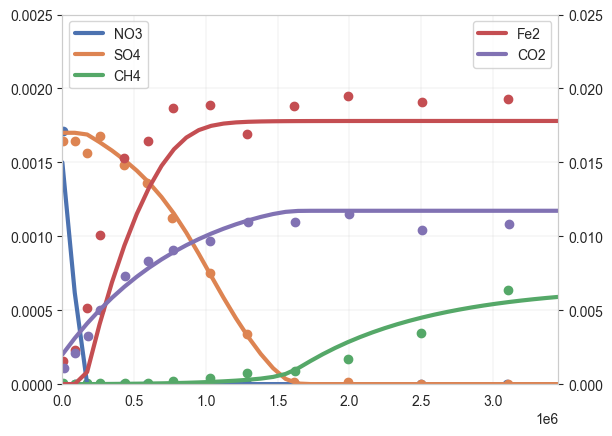

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(calibrator.lab.time, calibrator.lab.NO3.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='NO3')
ax1.scatter(NO3_t, NO3, c=sns.color_palette("deep", 10)[0], lw=1)
ax1.plot(calibrator.lab.time, calibrator.lab.SO4.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='SO4')
ax1.scatter(SO4_t, SO4, c=sns.color_palette("deep", 10)[1], lw=1,)
ax1.plot(calibrator.lab.time, calibrator.lab.CH4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CH4')
ax1.scatter(CH4_t, CH4, c=sns.color_palette("deep", 10)[2], lw=1,)
ax2.plot(calibrator.lab.time, calibrator.lab.Fe2.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='Fe2')
ax2.scatter(Fe2_t, Fe2, c=sns.color_palette("deep", 10)[3], lw=1,)
ax2.plot(calibrator.lab.time, calibrator.lab.CO2.concentration[0], c=sns.color_palette("deep", 10)[4], lw=3, label='CO2')
ax2.scatter(CO2_t, CO2, c=sns.color_palette("deep", 10)[4], lw=1,)
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 2.5e-3)
ax1.set_xlim(0, 40*24*60*60)
ax2.set_ylim(0, 25e-3)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)